# Decision Tree Regression (using DecisionTrees.jl)

Adapted from http://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html

A 1D regression with decision tree.

In [1]:
using DecisionTree
using ScikitLearn, Random, Statistics
using PyPlot

In [5]:
# Create a random dataset
Random.seed!(42)
X = sort(5 * rand(80))
XX = reshape(X, 80, 1)
y = sin.(X)
y[1:5:end] += 3 * (0.5 .- rand(16))

16-element Array{Float64,1}:
  0.3181585121757254 
 -0.11543979760894962
  2.034950878743591  
  1.8360932912525723 
  0.2550086740162336 
  0.6456749766313157 
  2.289331564552235  
 -0.6419087367296724 
  0.6329210196137418 
  1.2161932753083604 
  1.3073428878099895 
 -0.9693936308844004 
 -0.9127543280436007 
 -0.29164352961301176
 -2.050839513961799  
  0.12377545906151521

In [6]:
# Fit regression model
regr_1 = DecisionTreeRegressor()
regr_2 = DecisionTreeRegressor(pruning_purity_threshold=0.05)
regr_3 = RandomForestRegressor(n_trees=20)
fit!(regr_1, XX, y)
fit!(regr_2, XX, y)
fit!(regr_3, XX, y)

RandomForestRegressor
n_trees:             20
n_subfeatures:       -1
partial_sampling:    0.7
max_depth:           -1
min_samples_leaf:    5
min_samples_split:   2
min_purity_increase: 0.0
ensemble:            

Ensemble of Decision Trees
Trees:      20
Avg Leaves: 8.6
Avg Depth:  5.15

In [7]:
# Predict
X_test = 0:0.01:5.0
y_1 = predict(regr_1, hcat(X_test))
y_2 = predict(regr_2, hcat(X_test))
y_3 = predict(regr_3, hcat(X_test));

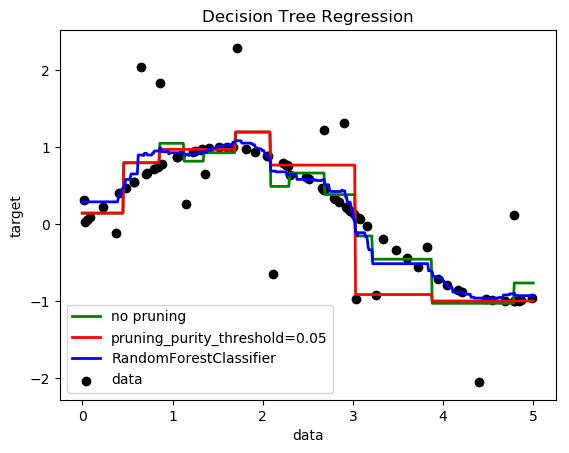

In [8]:
scatter(X, y, c="k", label="data")
plot(X_test, y_1, c="g", label="no pruning", linewidth=2)
plot(X_test, y_2, c="r", label="pruning_purity_threshold=0.05", linewidth=2)
plot(X_test, y_3, c="b", label="RandomForestClassifier", linewidth=2)
xlabel("data")
ylabel("target")
title("Decision Tree Regression")
legend(prop=Dict("size"=>10));